In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, confusion_matrix
)

# Set random seeds for reproducibility
# This ensures that the random numbers generated are the same every time the code is run,
# which is important for debugging and comparing results across runs.
torch.manual_seed(0)
np.random.seed(0)

# Regression data
# Here we simulate a regression problem: y_true_reg is a linearly increasing sequence (0 to 10)
# with some added Gaussian noise to make it realistic. y_pred_reg is a further noisy version of y_true_reg,
# representing the predictions of a hypothetical regression model.
y_true_reg = torch.linspace(0, 10, steps=100) + torch.randn(100) * 0.5
y_pred_reg = y_true_reg + torch.randn(100) * 0.8

# Classification data
# y_true_cls: binary class labels (0 or 1) randomly assigned.
# y_scores: simulated model output probabilities after applying sigmoid (values in [0,1]).
# y_pred_cls: hard class predictions obtained by thresholding the probabilities at 0.5.
y_true_cls = torch.randint(0, 2, (200,))
y_scores = torch.sigmoid(torch.randn(200))
y_pred_cls = (y_scores > 0.5).long()

# Convert to NumPy for sklearn metrics
# scikit-learn metrics functions expect NumPy arrays, not PyTorch tensors.
y_true_reg_np = y_true_reg.numpy()
y_pred_reg_np = y_pred_reg.numpy()
y_true_cls_np = y_true_cls.numpy()
y_scores_np = y_scores.numpy()
y_pred_cls_np = y_pred_cls.numpy()

# 1. Calculate and explain specific regression metrics
mae = mean_absolute_error(y_true_reg_np, y_pred_reg_np)
r2 = r2_score(y_true_reg_np, y_pred_reg_np)
print("Selected Regression Metrics:")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}\n")
# Explanation:
# MAE (Mean Absolute Error) measures the average magnitude of the errors between predictions and true values,
# without considering their direction (positive/negative). Smaller values indicate better fit.
# R² (Coefficient of Determination) measures how well the predicted values approximate the true data.
# R² = 1 means perfect predictions, R² = 0 means the model is no better than predicting the mean.

# 2. Calculate and explain specific classification metrics
precision = precision_score(y_true_cls_np, y_pred_cls_np, zero_division=0)
recall = recall_score(y_true_cls_np, y_pred_cls_np, zero_division=0)
print("Selected Classification Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}\n")
# Explanation:
# Precision = (True Positives) / (True Positives + False Positives)
# It measures how many predicted positives are actually correct.
# Recall = (True Positives) / (True Positives + False Negatives)
# It measures how many actual positives the model successfully detected.
# High precision means fewer false alarms; high recall means fewer misses.

# 3. Demonstrate evaluation using torch.no_grad()
# Simulate a PyTorch model's output (already done with y_pred tensors)
with torch.no_grad():
    # In a real scenario, this would be:
    # model.eval()  # set model to evaluation mode (important for layers like dropout or batch norm)
    # y_pred_reg_tensor = model(X_test_reg)
    # y_pred_cls_tensor = (torch.sigmoid(model_cls(X_test_cls)) > 0.5).long()

    # For this exercise, we'll use the existing tensors
    mae_eval = mean_absolute_error(y_true_reg.numpy(), y_pred_reg.numpy())
    accuracy_eval = accuracy_score(y_true_cls.numpy(), y_pred_cls.numpy())

    print("Evaluation within torch.no_grad():")
    print(f"MAE (eval): {mae_eval:.3f}")
    print(f"Accuracy (eval): {accuracy_eval:.3f}")
    # Explanation of why torch.no_grad() and model.eval() are important:
    # torch.no_grad(): Disables gradient tracking, which reduces memory usage and speeds up computations
    # during evaluation or inference (no backpropagation needed).
    # model.eval(): Switches the model to evaluation mode, ensuring that layers like dropout and batch norm
    # behave deterministically and use learned statistics instead of training-time randomness.


Selected Regression Metrics:
MAE: 0.614
R²: 0.936

Selected Classification Metrics:
Precision: 0.564
Recall: 0.509

Evaluation within torch.no_grad():
MAE (eval): 0.614
Accuracy (eval): 0.505


Classification Metrics:
Accuracy: 0.505 | Precision: 0.564
Recall: 0.509 | F1: 0.535 | AUC: 0.523



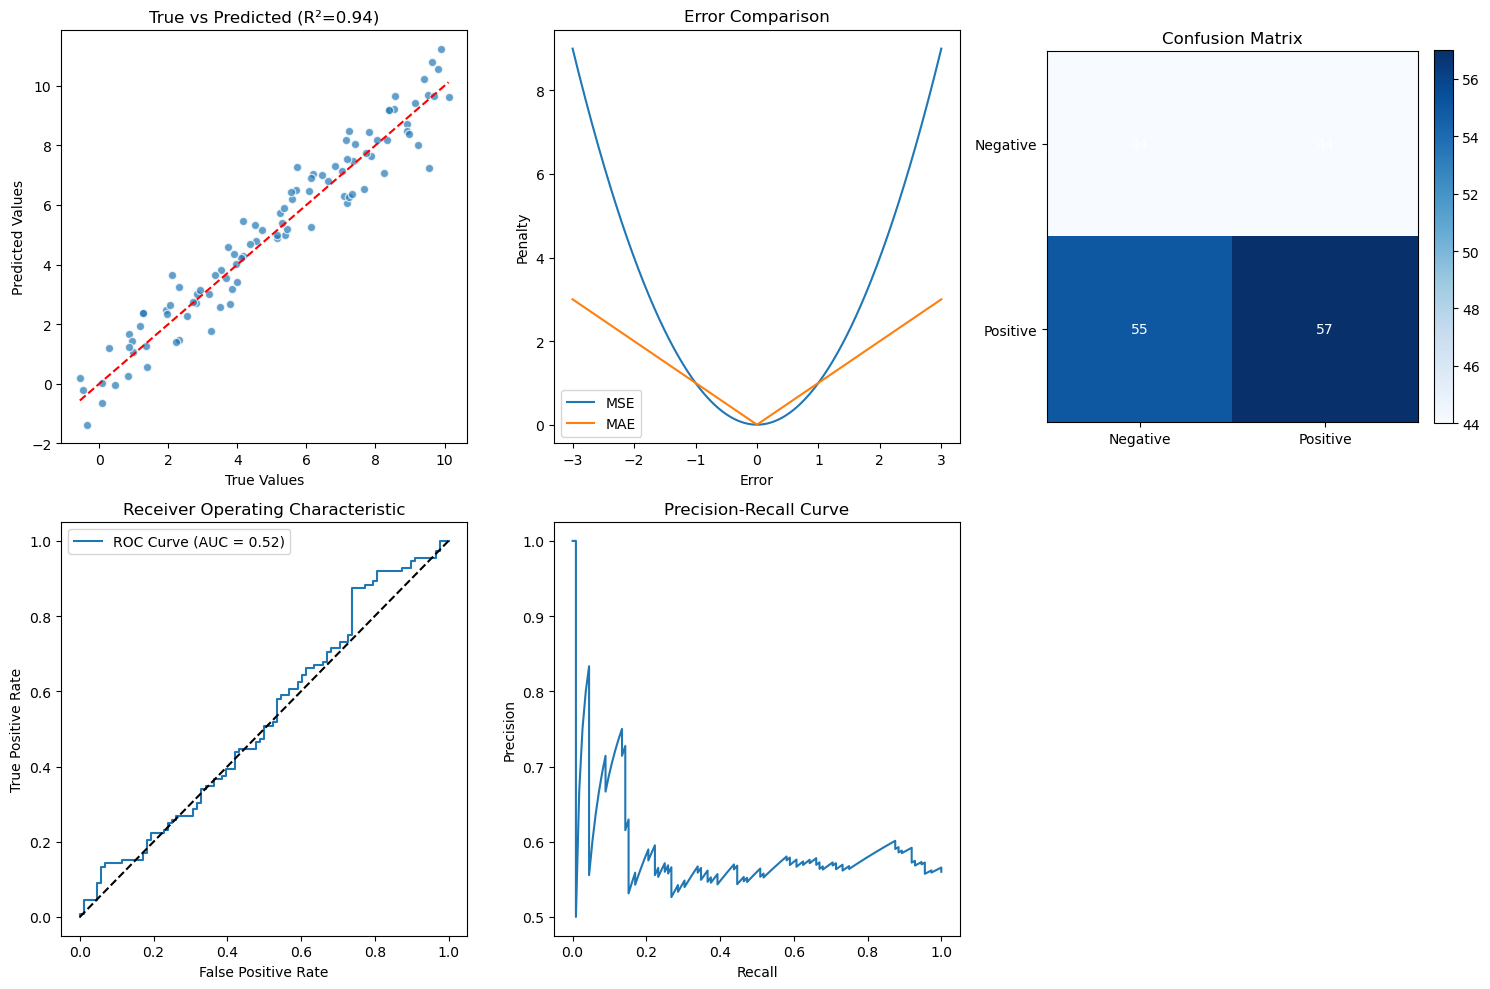

In [4]:
# ----------------------
# 3. Compute Classification Metrics
# ----------------------
accuracy = accuracy_score(y_true_cls_np, y_pred_cls_np)
precision = precision_score(y_true_cls_np, y_pred_cls_np, zero_division=0)
recall = recall_score(y_true_cls_np, y_pred_cls_np, zero_division=0)
f1 = f1_score(y_true_cls_np, y_pred_cls_np, zero_division=0)
fpr, tpr, _ = roc_curve(y_true_cls_np, y_scores_np)
roc_auc = auc(fpr, tpr)
prec_curve, rec_curve, _ = precision_recall_curve(y_true_cls_np, y_scores_np)
cm = confusion_matrix(y_true_cls_np, y_pred_cls_np)

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.3f} | Precision: {precision:.3f}")
print(f"Recall: {recall:.3f} | F1: {f1:.3f} | AUC: {roc_auc:.3f}\n")

# ----------------------
# 4. Visualization
# ----------------------
plt.figure(figsize=(15, 10))

# Regression Plots
plt.subplot(2, 3, 1)
plt.scatter(y_true_reg_np, y_pred_reg_np, alpha=0.7, edgecolors='w')
plt.plot([y_true_reg_np.min(), y_true_reg_np.max()], 
         [y_true_reg_np.min(), y_true_reg_np.max()], '--r')
plt.title(f"True vs Predicted (R²={r2:.2f})")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 2)
errors = np.linspace(-3, 3, 400)
plt.plot(errors, errors**2, label='MSE')
plt.plot(errors, np.abs(errors), label='MAE')
plt.title("Error Comparison")
plt.xlabel("Error")
plt.ylabel("Penalty")
plt.legend()

# Classification Plots
plt.subplot(2, 3, 3)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0, 1], ["Negative", "Positive"])
plt.yticks([0, 1], ["Negative", "Positive"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], 
                 ha="center", va="center", 
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.subplot(2, 3, 4)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--k')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(rec_curve, prec_curve)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.tight_layout()
plt.show()